Figure 1- Data Visualization

Educational Attainment and Confidence in Education Data Exploration

By: Aaron Zhao

In [1]:
use NewGSS.dta, clear

In [2]:
tabstat coneducation, by(immigrant)
///Immigrants, in general, have higher confidence


Summary for variables: coneducation
Group variable: immigrant (Country of Origin of Respondents)

immigrant |      Mean
----------+----------
     U.S. |  2.036404
Immigrant |  2.237374
----------+----------
    Total |  2.062176
---------------------


In [3]:
tabstat education, by(immigrant)
///Immigrants, in general, have lower educational attainment


Summary for variables: education
Group variable: immigrant (Country of Origin of Respondents)

immigrant |      Mean
----------+----------
     U.S. |  2.532689
Immigrant |  2.353535
----------+----------
    Total |  2.509715
---------------------


In [4]:
tabstat coneducation, by(education)
//In general, people who have lower educational attainment will have higher confidence


Summary for variables: coneducation
Group variable: education (Level of Education Attainment)

education |      Mean
----------+----------
      Low |  2.612903
     Some |  2.113669
     High |  1.997555
----------+----------
    Total |  2.062176
---------------------


In [5]:
eststo: reg coneducation education immigrant


      Source |       SS           df       MS      Number of obs   =     1,544
-------------+----------------------------------   F(2, 1541)      =     18.97
       Model |     16.1504         2  8.07520001   Prob > F        =    0.0000
    Residual |  655.880688     1,541  .425620174   R-squared       =    0.0240
-------------+----------------------------------   Adj R-squared   =    0.0228
       Total |  672.031088     1,543  .435535378   Root MSE        =     .6524

------------------------------------------------------------------------------
coneducation | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
   education |  -.1440558   .0310203    -4.64   0.000    -.2049023   -.0832094
   immigrant |   .1751614   .0499669     3.51   0.000      .077151    .2731717
       _cons |   2.226091   .1024255    21.73   0.000     2.025183       2.427
--------------------------------------------------

In [6]:
%set graph_height = 8

graph size was (5.5in, 4in), is now (5.5in, 8).


In [7]:
%set graph_width = 11

graph size was (5.5in, 8), is now (11, 8).



Variables that uniquely identify margins: immigrant
(note: scheme 538w not found, using s2color)


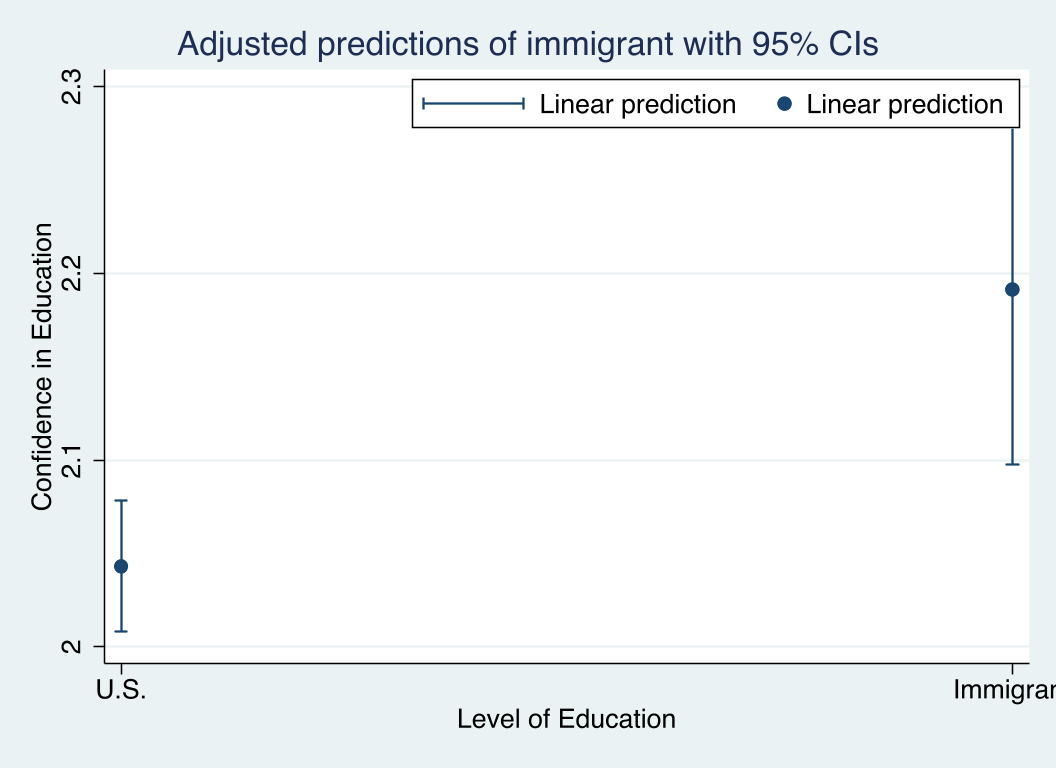

In [8]:
quietly reg coneducation i.education i.immigrant
quietly margins i.immigrant,  atmeans
marginsplot, recast(scatter) legend(on) xtitle("Level of Education") ///
ytitle("Confidence in Education") legend(rows(1) position(1) ring(0)) scheme(538w)

In [10]:
graph save US_Imm_interaction, replace

(file US_Imm_interaction.gph not found)
file US_Imm_interaction.gph saved


In [11]:
graph export data/US_Imm_interaction.pdf, replace

file data/US_Imm_interaction.pdf saved as PDF format



Variables that uniquely identify margins: education immigrant
(note: scheme 538w not found, using s2color)


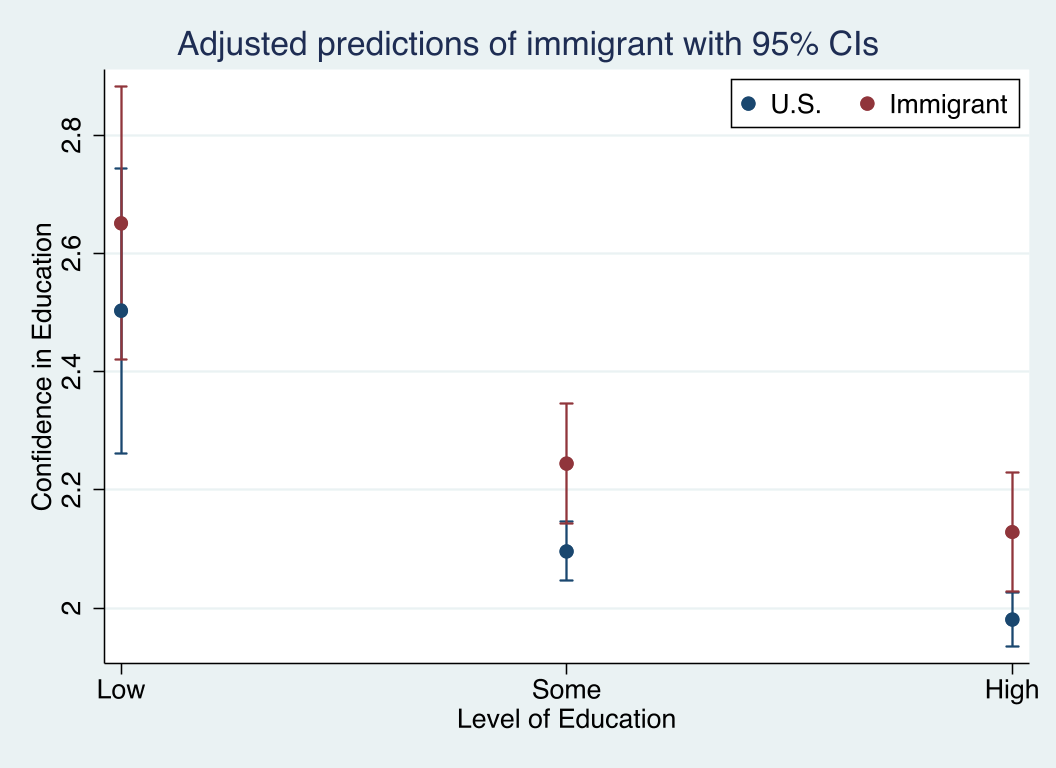

In [9]:
quietly reg coneducation i.education i.immigrant
quietly margins immigrant, at(education=(1(1)3)) atmeans
marginsplot, recast(scatter) legend(on) xtitle("Level of Education") ///
ytitle("Confidence in Education") legend(rows(1) position(1) ring(0)) scheme(538w)

In [12]:
graph save Educ_Coneduc_interaction, replace

(file Educ_Coneduc_interaction.gph not found)
file Educ_Coneduc_interaction.gph saved


In [13]:
graph export Educ_Coneduc_interaction.pdf, replace

file Educ_Coneduc_interaction.pdf saved as PDF format
